In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rohitnair/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rohitnair/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /Users/rohitnair/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [31]:
temp = pd.read_csv("/Users/rohitnair/Documents/MSDS/6120 NLP/HW2/data-1.csv")

In [32]:
temp.text

pd.DataFrame(data)
data = temp[['text', 'target']].copy()


In [33]:
data.shape

(7613, 2)

In [34]:
data['new_col'] = data.apply(lambda row : clean_text(row['text']) , axis=1)


In [35]:
data2 = data
data2 = data2.drop('text', axis=1)
data2


,target,new_col
0,1,deed reason earthquake may allah forgive u
1,1,forest fire near la ronge sask canada
2,1,resident asked shelter place notified officer ...
3,1,13000 people receive wildfire evacuation order...
4,1,got sent photo ruby alaska smoke wildfire pour...
...,...,...
7608,1,two giant crane holding bridge collapse nearby...
7609,1,ariaahrary thetawniest control wild fire calif...
7610,1,m194 0104 utc5km volcano hawaii
7611,1,police investigating ebike collided car little...


In [36]:
countvectorizer1 = CountVectorizer()


In [37]:
cv = countvectorizer1.fit_transform(data2['new_col'])
cv.shape
print(type(cv))
cv = pd.DataFrame(cv.todense(), columns=countvectorizer1.get_feature_names_out())
print(type(cv))
cv.shape
cv = np.array(cv)
print(type(cv))
print(cv.shape)


<class 'scipy.sparse._csr.csr_matrix'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(7613, 16362)


In [38]:
y = data2['target']
y.shape
y = np.array(y)

In [39]:
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.metrics import AUC

tf.random.set_seed(42)


In [40]:
import tensorflow as tf
def build_model(X):
  # layer 1 : input layer
  inp = tf.keras.Input((X.shape[1],))

  # layer 2 : dense layer with 64 units and relu activation
  dense1 = tf.keras.layers.Dense(64,activation='relu')(inp)

  # layer 3 : dropout layer with dropout rate of 0.5
  dropout1 = tf.keras.layers.Dropout(0.5)(dense1)

  # layer 4 : dense layer with 32 units with tanh activation and with l2 regularization
  dense2 = tf.keras.layers.Dense(32,activation='tanh',kernel_regularizer=tf.keras.regularizers.l2(0.01))(dropout1)

  # layer 5 : dropout layer with dropout rate of 0.5
  dropout2 = tf.keras.layers.Dropout(0.5)(dense2)

  # layer 6 : dense layer with 16 units with tanh activation and with l2 regularization
  dense3 = tf.keras.layers.Dense(16,activation='tanh',kernel_regularizer=tf.keras.regularizers.l2(0.01))(dropout2)

  # layer 7 : dropout layer with dropout rate of 0.5
  dropout3 = tf.keras.layers.Dropout(0.5)(dense3)

  # layer 8 : output layer with units equal to 1 and activation as sigmoid
  output = tf.keras.layers.Dense(1,activation='sigmoid')(dropout3)

  # Create the model using the functional API
  model = tf.keras.Model(inputs=inp,outputs=output)

  # Compile the model using binary crossentropy loss, rmsprop optimizer and evaluating model on auc
  model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=[AUC(name='auc')])

  return model

In [41]:
skf = StratifiedKFold(n_splits=5)

splits = skf.split(cv , y)
print(splits)

<generator object _BaseKFold.split at 0x17e166340>


Fold 1
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16362)]           0         
                                                                 
 dense_4 (Dense)             (None, 64)                1047232   
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)             

2023-02-18 19:52:19.411265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - ETA: 0s - loss: 0.7614 - auc: 0.7658

2023-02-18 19:52:27.478896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - 10s 23ms/step - loss: 0.7614 - auc: 0.7658 - val_loss: 0.6541 - val_auc: 0.7395
Epoch 2/5
381/381 [==============================] - 8s 20ms/step - loss: 0.4569 - auc: 0.8880 - val_loss: 0.6219 - val_auc: 0.7358
Epoch 3/5
381/381 [==============================] - 8s 21ms/step - loss: 0.3933 - auc: 0.9108 - val_loss: 0.6045 - val_auc: 0.7420
Epoch 4/5
381/381 [==============================] - 8s 22ms/step - loss: 0.3608 - auc: 0.9230 - val_loss: 0.6006 - val_auc: 0.7428
Epoch 5/5
381/381 [==============================] - 8s 22ms/step - loss: 0.3434 - auc: 0.9283 - val_loss: 0.6017 - val_auc: 0.7428


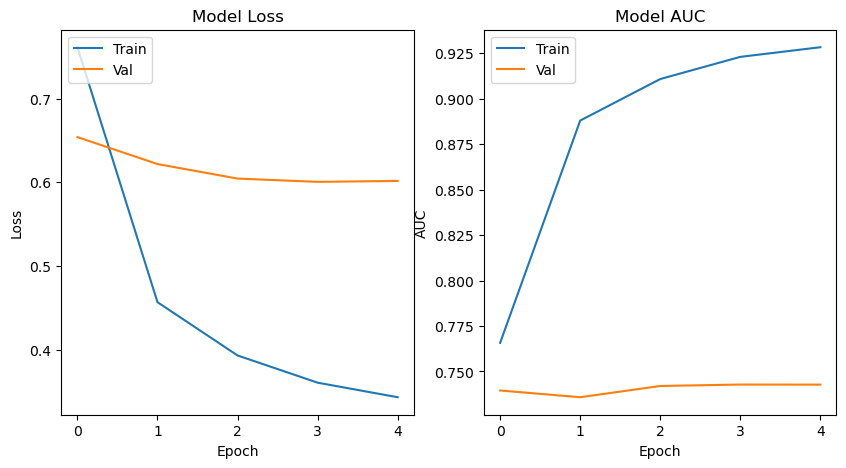

Fold 2
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 16362)]           0         
                                                                 
 dense_8 (Dense)             (None, 64)                1047232   
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_8 (Dropout)         (None, 16)             

2023-02-18 19:53:02.786961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - ETA: 0s - loss: 0.7620 - auc: 0.7861

2023-02-18 19:53:12.210225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - 11s 26ms/step - loss: 0.7620 - auc: 0.7861 - val_loss: 0.6804 - val_auc: 0.7048
Epoch 2/5
381/381 [==============================] - 8s 21ms/step - loss: 0.4364 - auc: 0.9023 - val_loss: 0.6666 - val_auc: 0.7033
Epoch 3/5
381/381 [==============================] - 8s 22ms/step - loss: 0.3736 - auc: 0.9212 - val_loss: 0.6723 - val_auc: 0.7020
Epoch 4/5
381/381 [==============================] - 8s 21ms/step - loss: 0.3394 - auc: 0.9323 - val_loss: 0.6834 - val_auc: 0.6980
Epoch 5/5
381/381 [==============================] - 8s 21ms/step - loss: 0.3227 - auc: 0.9386 - val_loss: 0.6888 - val_auc: 0.6970


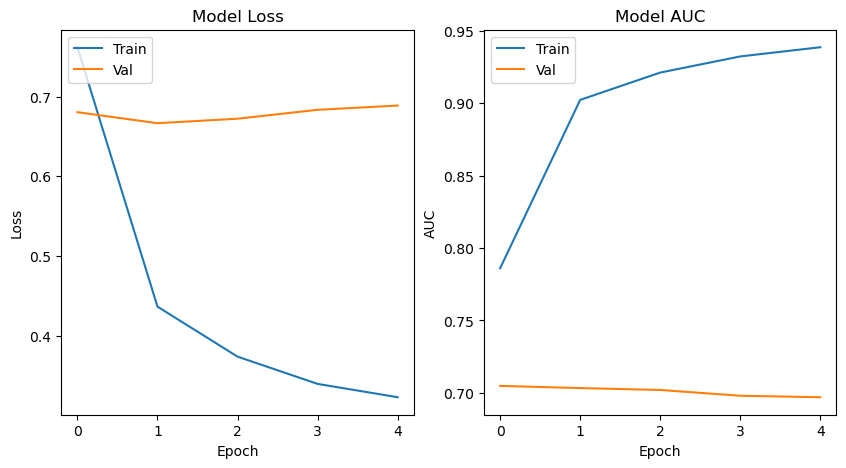

Fold 3
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 16362)]           0         
                                                                 
 dense_12 (Dense)            (None, 64)                1047232   
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dropout_11 (Dropout)        (None, 16)             

2023-02-18 19:53:47.922799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - ETA: 0s - loss: 0.7649 - auc: 0.7694

2023-02-18 19:53:56.785025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - 11s 25ms/step - loss: 0.7649 - auc: 0.7694 - val_loss: 0.6467 - val_auc: 0.7598
Epoch 2/5
381/381 [==============================] - 10s 27ms/step - loss: 0.4458 - auc: 0.8923 - val_loss: 0.6213 - val_auc: 0.7566
Epoch 3/5
381/381 [==============================] - 12s 33ms/step - loss: 0.3810 - auc: 0.9159 - val_loss: 0.6316 - val_auc: 0.7573
Epoch 4/5
381/381 [==============================] - 13s 33ms/step - loss: 0.3509 - auc: 0.9266 - val_loss: 0.6413 - val_auc: 0.7560
Epoch 5/5
381/381 [==============================] - 10s 27ms/step - loss: 0.3335 - auc: 0.9322 - val_loss: 0.6286 - val_auc: 0.7575


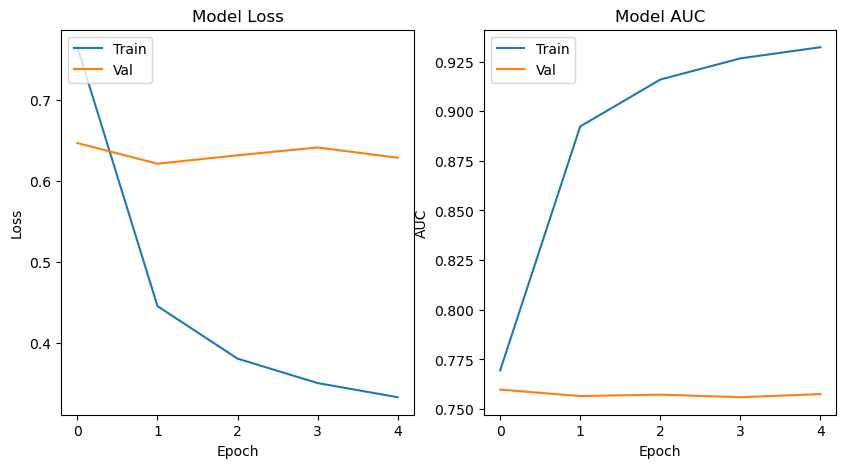

Fold 4
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 16362)]           0         
                                                                 
 dense_16 (Dense)            (None, 64)                1047232   
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dropout_14 (Dropout)        (None, 16)             

2023-02-18 19:54:47.003626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - ETA: 0s - loss: 0.7597 - auc: 0.7569

2023-02-18 19:54:57.961929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - 14s 31ms/step - loss: 0.7597 - auc: 0.7569 - val_loss: 0.6706 - val_auc: 0.7182
Epoch 2/5
381/381 [==============================] - 10s 26ms/step - loss: 0.4492 - auc: 0.8926 - val_loss: 0.6469 - val_auc: 0.7283
Epoch 3/5
381/381 [==============================] - 10s 25ms/step - loss: 0.3864 - auc: 0.9161 - val_loss: 0.6369 - val_auc: 0.7298
Epoch 4/5
381/381 [==============================] - 10s 26ms/step - loss: 0.3542 - auc: 0.9266 - val_loss: 0.6321 - val_auc: 0.7319
Epoch 5/5
381/381 [==============================] - 10s 26ms/step - loss: 0.3313 - auc: 0.9353 - val_loss: 0.6394 - val_auc: 0.7305


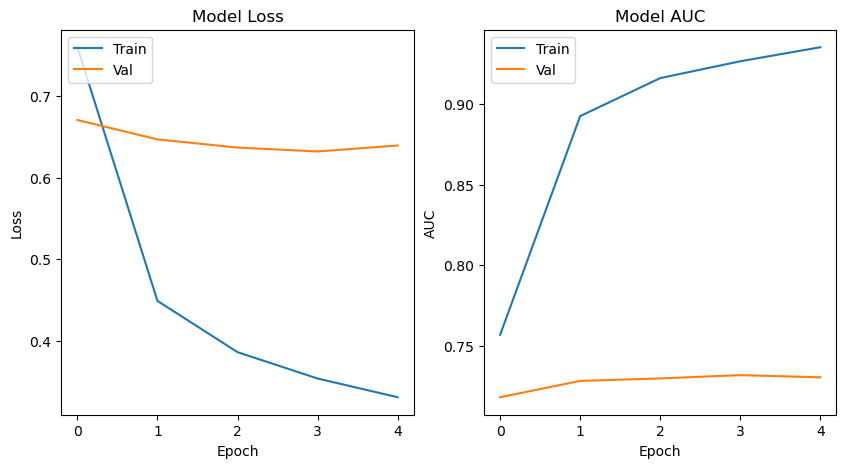

Fold 5
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 16362)]           0         
                                                                 
 dense_20 (Dense)            (None, 64)                1047232   
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dropout_17 (Dropout)        (None, 16)             

2023-02-18 19:55:42.276706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - ETA: 0s - loss: 0.7678 - auc: 0.7638

2023-02-18 19:55:51.416687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - 12s 26ms/step - loss: 0.7678 - auc: 0.7638 - val_loss: 0.5693 - val_auc: 0.8488
Epoch 2/5
381/381 [==============================] - 8s 21ms/step - loss: 0.4642 - auc: 0.8851 - val_loss: 0.5126 - val_auc: 0.8500
Epoch 3/5
381/381 [==============================] - 8s 22ms/step - loss: 0.3999 - auc: 0.9102 - val_loss: 0.5101 - val_auc: 0.8522
Epoch 4/5
381/381 [==============================] - 8s 22ms/step - loss: 0.3703 - auc: 0.9201 - val_loss: 0.4975 - val_auc: 0.8516
Epoch 5/5
381/381 [==============================] - 9s 24ms/step - loss: 0.3480 - auc: 0.9279 - val_loss: 0.5050 - val_auc: 0.8525


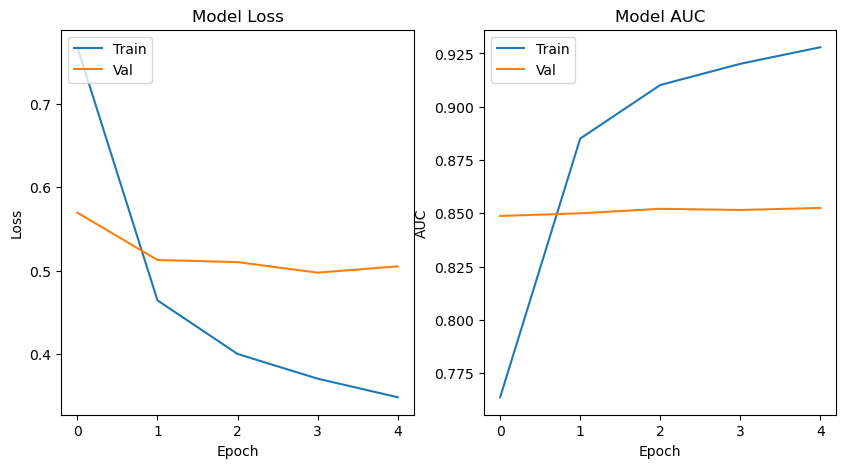

In [43]:
from sklearn.metrics import accuracy_score
fold_no = 1
for train_index, test_index in skf.split(cv, y):
    X_train = cv[train_index,:]
    y_train = y[train_index]
    #X_train, X_valid
    X_test = cv[test_index,:]
    y_test = y[test_index]
    print('Fold',str(fold_no))
    model = build_model(X_train)
    model.summary()

    history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test) ,  verbose = 1)
    fig,fig_2 = plt.subplots(1, 2, figsize = (10,5))
    
    fig_2[0].plot(history.history['loss'])
    fig_2[0].plot(history.history['val_loss'])
    fig_2[0].set_title('Model Loss')
    fig_2[0].set(xlabel = 'Epoch', ylabel = 'Loss')
    fig_2[0].legend(['Train', 'Val'], loc='upper left')

 

    fig_2[1].plot(history.history['auc'])
    fig_2[1].plot(history.history['val_auc'])
    fig_2[1].set_title('Model AUC')
    fig_2[1].set(xlabel = 'Epoch', ylabel = 'AUC')
    fig_2[1].legend(['Train', 'Val'], loc = 'upper left')
    
    plt.show()
    fold_no += 1
    
    
    

# Building Multinomial Navie Bayes on Countvectors


AUC and ROC curve for Fold 1
AUC  =  0.7505


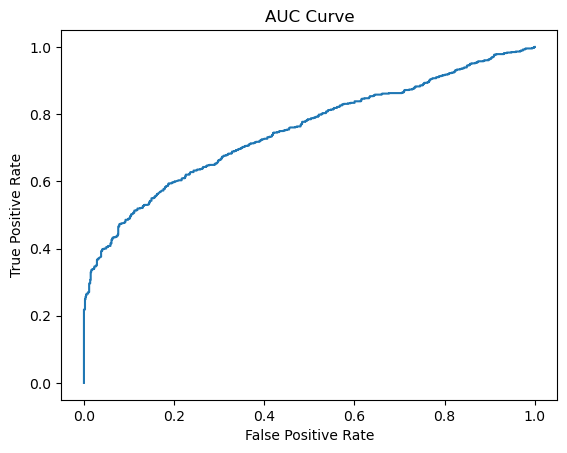

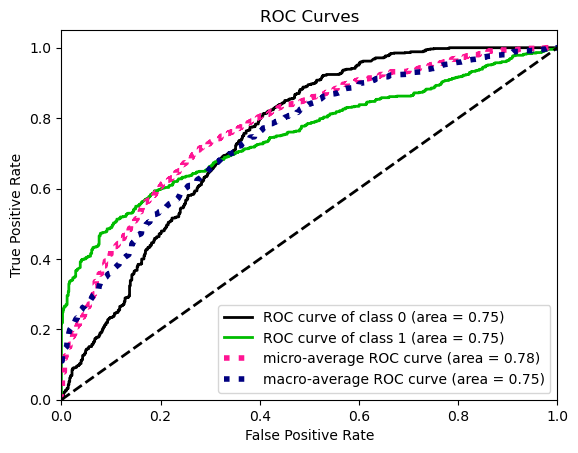


AUC and ROC curve for Fold 2
AUC  =  0.7065


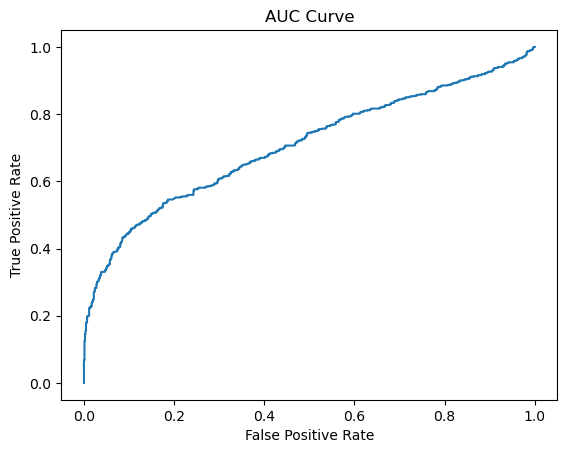

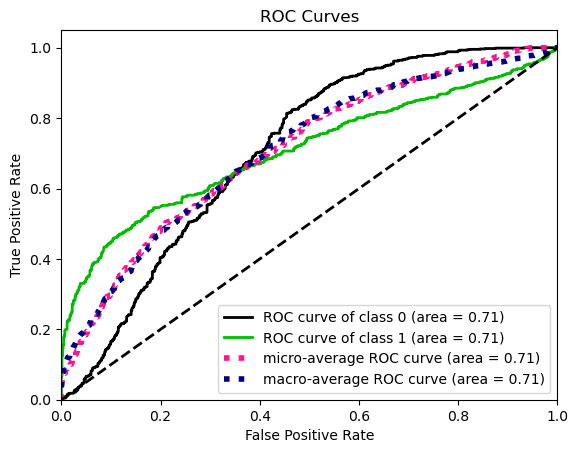


AUC and ROC curve for Fold 3
AUC  =  0.7761


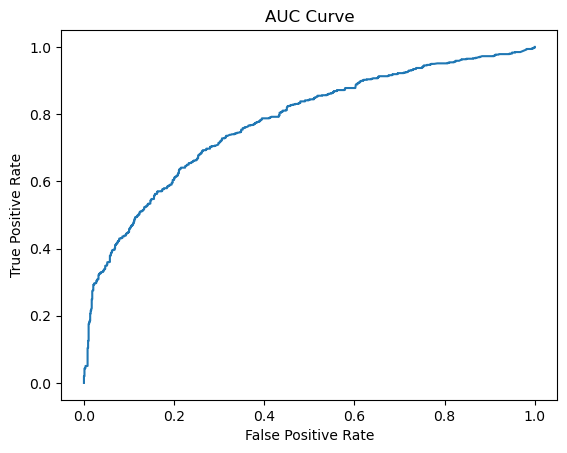

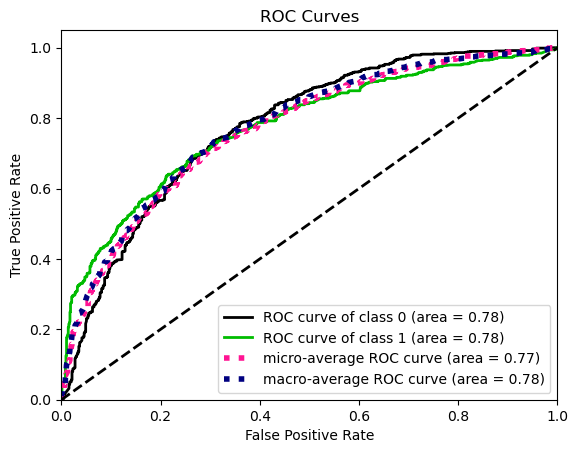


AUC and ROC curve for Fold 4
AUC  =  0.7442


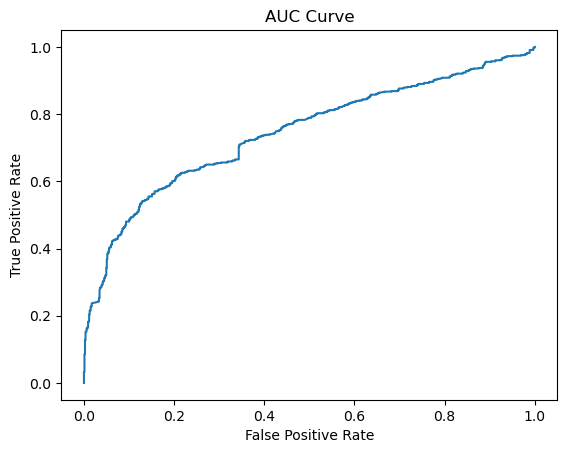

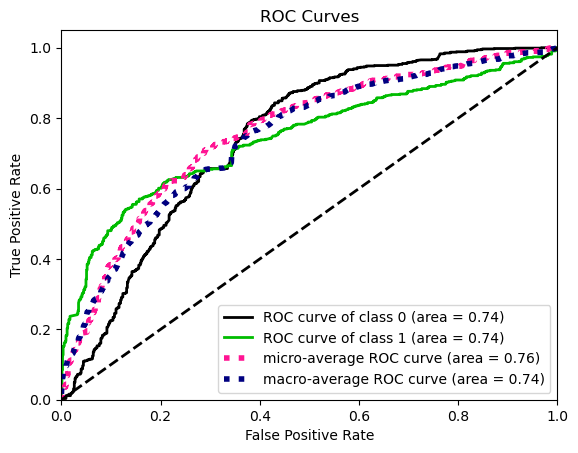


AUC and ROC curve for Fold 5
AUC  =  0.8577


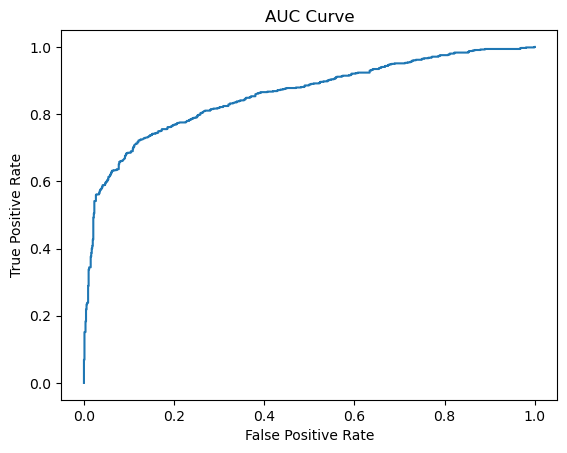

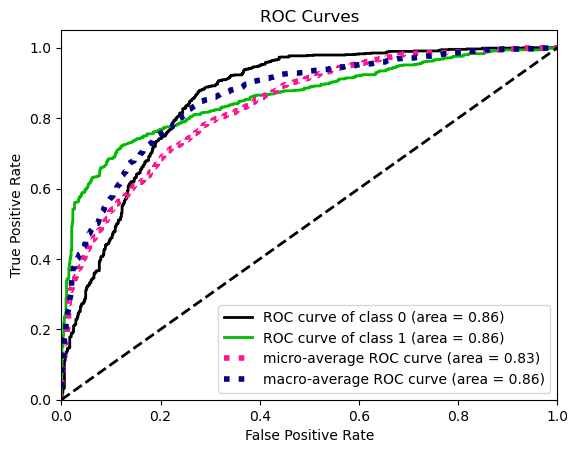

In [63]:
from sklearn.naive_bayes import MultinomialNB
import scikitplot as skplt
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import auc
fold_no = 1

for train_index, valid_index in skf.split(cv, y):
    X_train, X_valid = cv[train_index], cv[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    NaiveB_model = MultinomialNB()

    NaiveB_model.fit(X_train, y_train)

    y_pred = NaiveB_model.predict_proba(X_valid)
    fpr, tpr, thresholds = roc_curve(y_valid, y_pred[:, 1])
    auc_1 = roc_auc_score(y_valid, y_pred[:, 1])
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC Curve')
    print(f"AUC and ROC curve for Fold {fold_no}")
    print("AUC  = " , str(round(auc_1, 4)))
    skplt.metrics.plot_roc(y_valid, NaiveB_model.predict_proba(X_valid))
    fold_no =fold_no + 1
    
    plt.show()
    print()
    
    
    

AUC value changes  with each iteration. TPR is maximised for the last iteration while FPR is minimised. Variation in ROC and AUC for the same dataset is beacuse we are performing k fold crossvalidation. Here K = 5. Since the Test/Train sets are different in each iteration, some sets may provide a higher AUC compared to others.